## Deep Learning with TensorFlow 2.0 
##  First ANN with TensorFlow 2.0

#### What is ANN?

Artificial Neural Networks (ANN) is a supervised learning system built of a large number of simple elements, called neurons or perceptrons. Each neuron can make simple decisions, and feeds those decisions to other neurons, organized in interconnected layers.

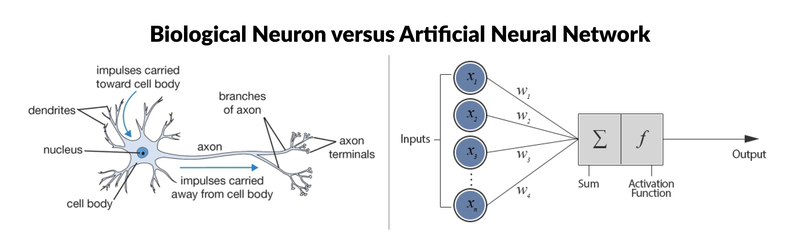

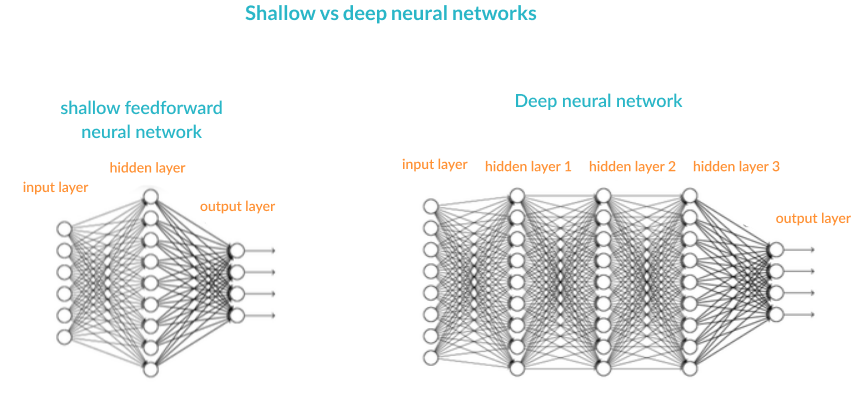

#### What is Activation Function?

If we do not apply a Activation function then the output signal would simply be a simple linear function.A linear function is just a polynomial of one degree.

In [52]:
# in input we use relu and in Output we use Sigmoid Classification

- Sigmoid
- Tanh
- ReLu
- LeakyReLu
- SoftMax

#### What is Back Propagation? 

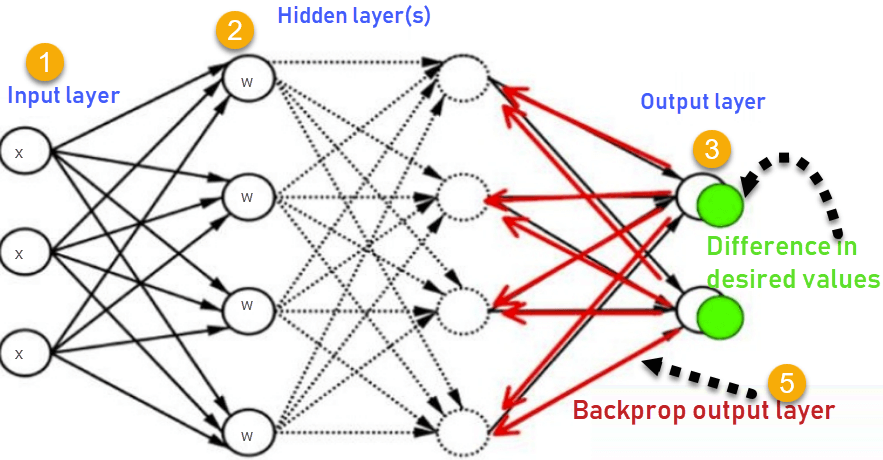

#### Steps for building your first ANN 

- Data Preprocessing
- Add input layer
- Random w init
- Add Hidden Layers
- Select Optimizer, Loss, and Performance Metrics
- Compile the model
- use model.fit to train the model
- Evaluate the model
- Adjust optimization parameters or model if needed

In [55]:
import tensorflow as tf  

#in Tensorflow keras is in tensorflow
from tensorflow import keras

#Sequential is with in Keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [56]:
import numpy as np
import pandas as pd

#sklearn to split train and split data
from sklearn.model_selection import train_test_split  

In [57]:
dataset = pd.read_csv('Customer_Churn_Modelling.csv')

In [58]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [61]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Since There are non Related Columns so lets remove Non related Columns

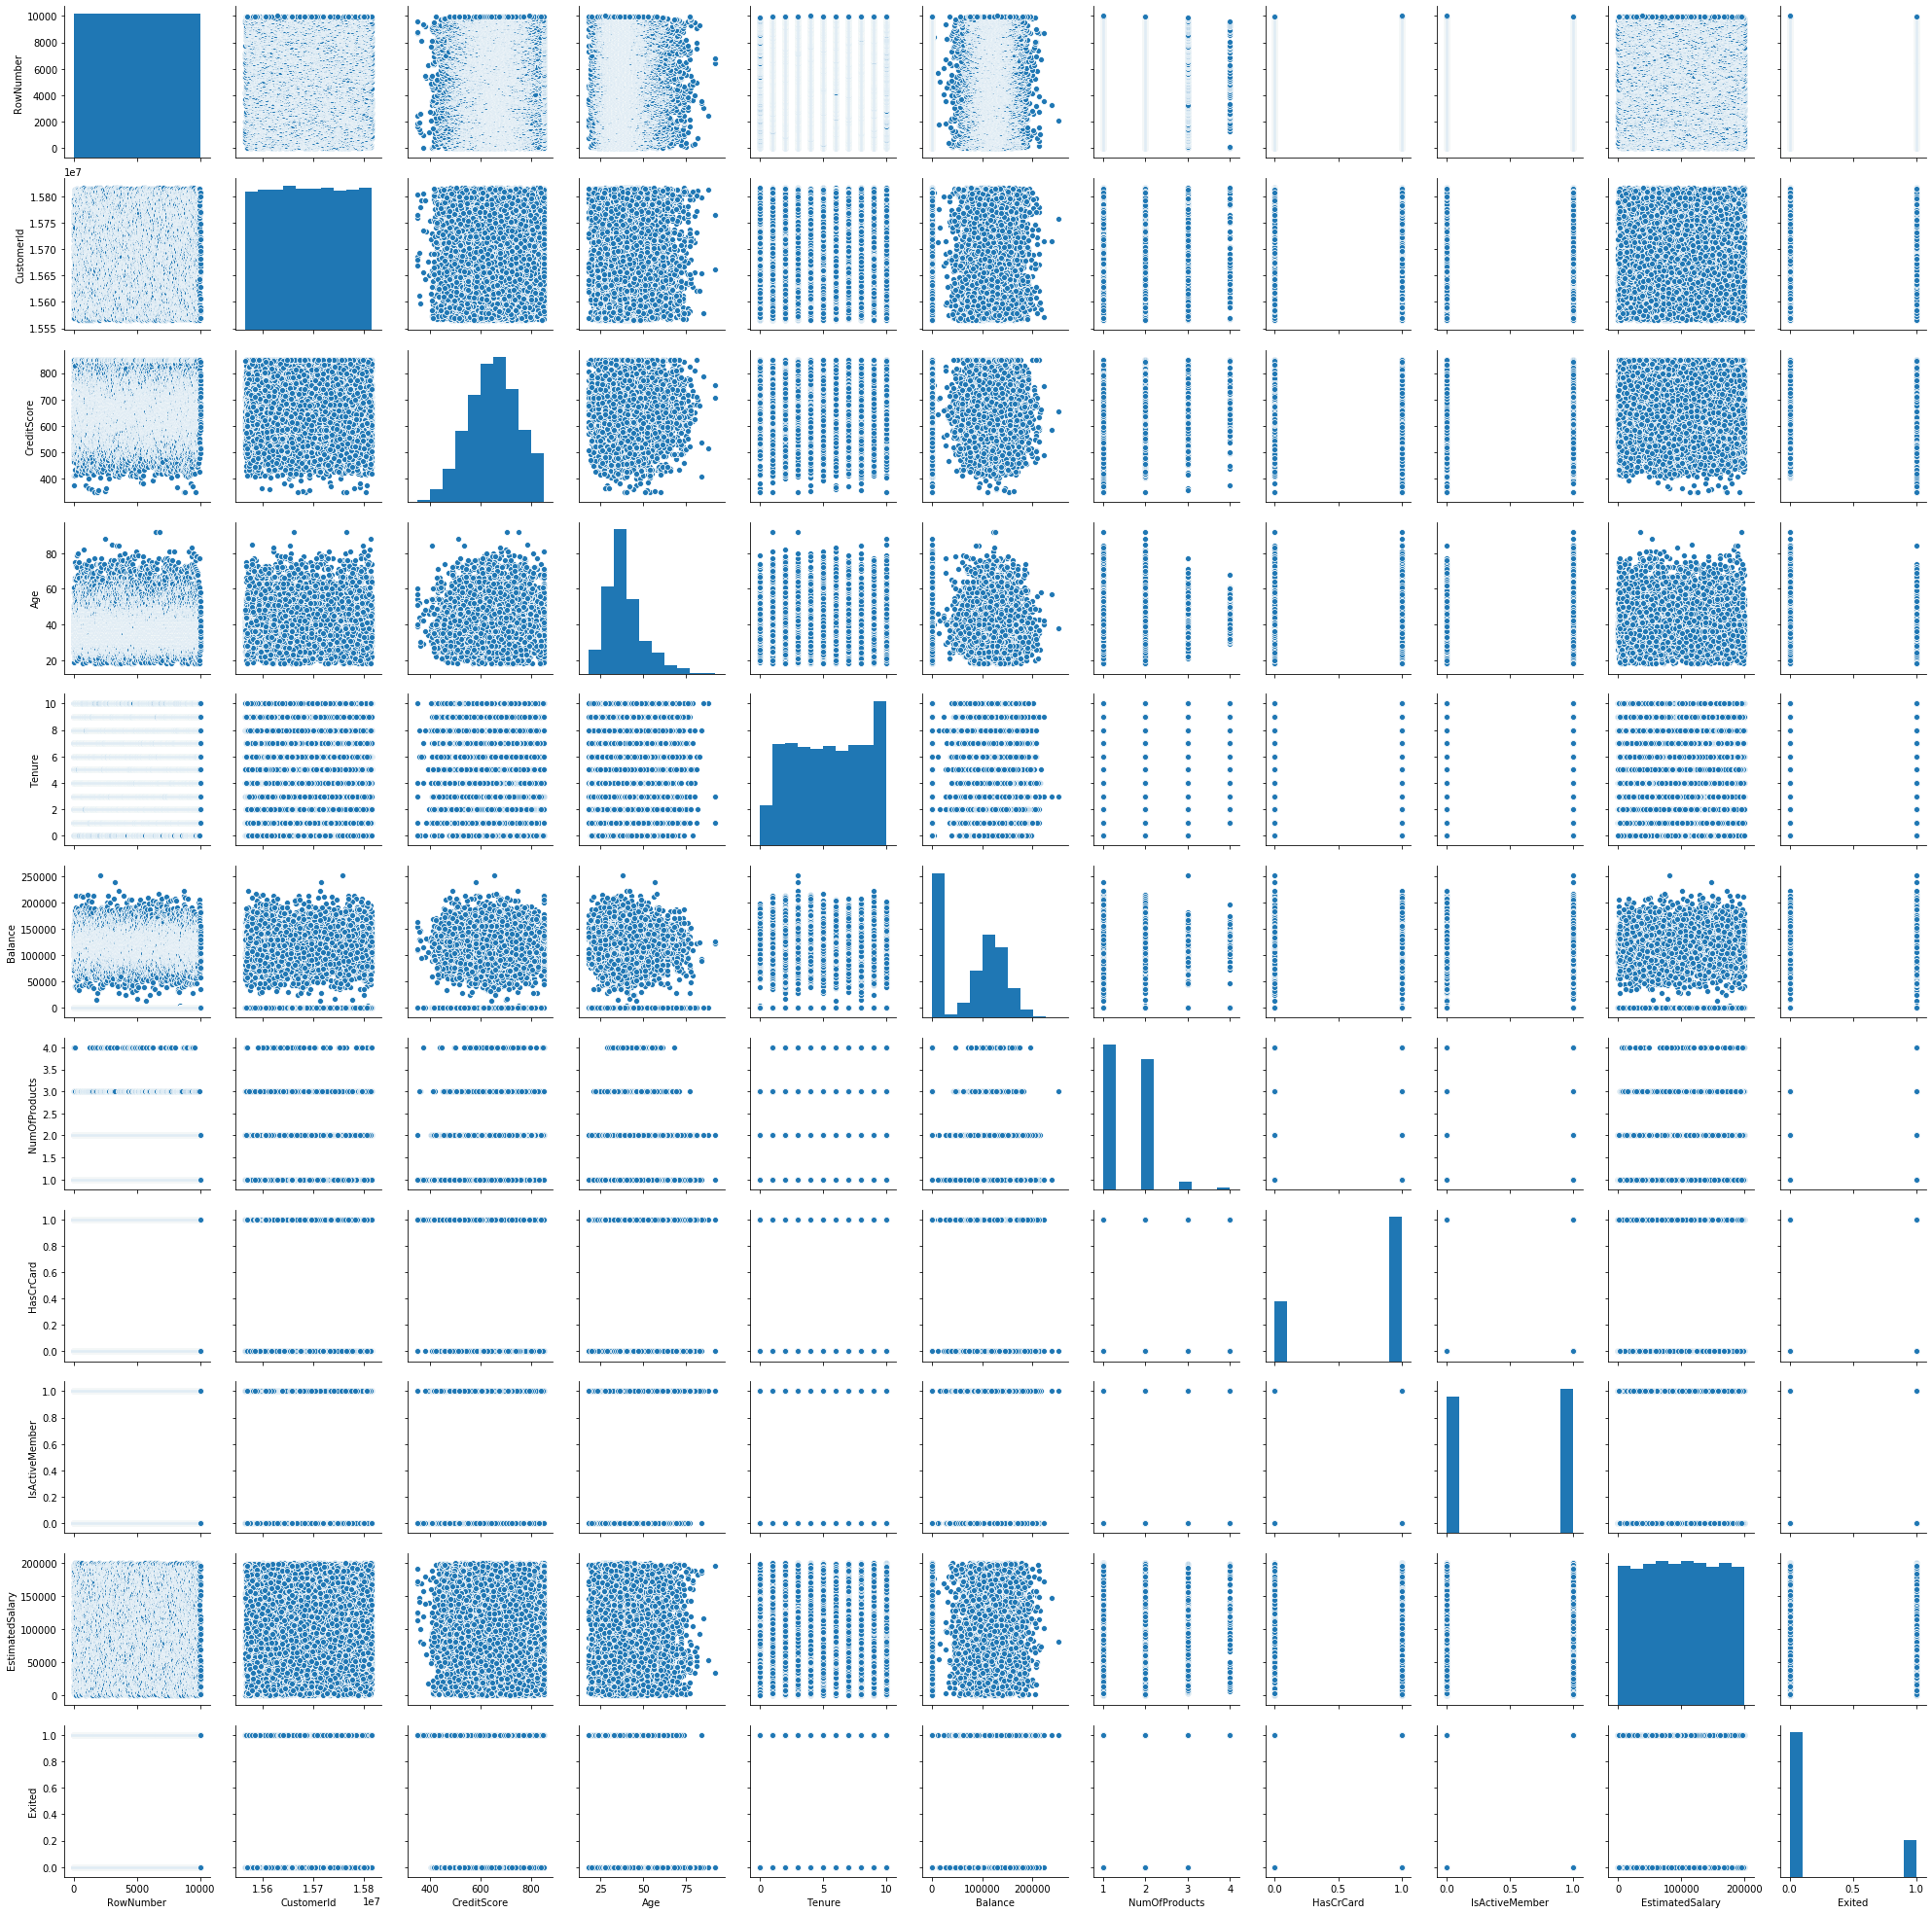

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(dataset)
plt.show()

Columns not havig not regression
In the above Fig if we check carefully 'RowNumber" "CustomerID', "Surname" , Exited doesnot seem any effect in Output
so drop Unnecessary COlumns 

In [76]:
X = dataset.drop(labels=['CustomerId', 'Surname', 'RowNumber', 'Exited'], axis = 1) #axis 1 means these are in Columns
y = dataset['Exited']

In [77]:
X.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58


In [78]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

Since Machine Learning Processing is difficult in Text so lets Encoding text data that is categorical data in to digits Label

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
label1 = LabelEncoder()
X['Geography'] = label1.fit_transform(X['Geography'])

In [81]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,Female,42,2,0.00,1,1,1,101348.88
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
2,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10


We can se Geography has been changed 0 means France 2 Means Spain<br>
Again Gender Female and Male to digit 

In [82]:
label = LabelEncoder()
X['Gender'] = label.fit_transform(X['Gender'])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [83]:
X.Geography.unique()

array([0, 2, 1], dtype=int64)

We can see that Geography Columns has only 3 Unique Value which means there are Only 3 Columns

Since Geography is categorical data so 2 is not reasonable so it need to converted to dummy variable i.e Yes No 0 1

In [84]:
X = pd.get_dummies(X, drop_first=True, columns=['Geography'])
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


Gender is only 2 Value so no need to convert in to dummy variable if there is more than 3 value we also need to change to dummy Variable

### Feature Standardization 
**StandardScaler** : It transforms the data in such a manner that it has `mean as 0 and standard deviation as 1`. In short, it standardizes the data. Standardization is useful for data which has negative values. It arranges the data in normal distribution. It is more useful in classification than regression.

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
# train test split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [94]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
X_train

array([[-1.24021723, -1.09665089,  0.77986083, ...,  1.64099027,
        -0.57812007, -0.57504086],
       [ 0.75974873,  0.91186722, -0.27382717, ..., -1.55587522,
         1.72974448, -0.57504086],
       [-1.72725557, -1.09665089, -0.9443559 , ...,  1.1038111 ,
        -0.57812007, -0.57504086],
       ...,
       [-0.51484098,  0.91186722,  0.87565065, ..., -1.01507508,
         1.72974448, -0.57504086],
       [ 0.73902369, -1.09665089, -0.36961699, ..., -1.47887193,
        -0.57812007, -0.57504086],
       [ 0.95663657,  0.91186722, -1.32751517, ...,  0.50945854,
        -0.57812007,  1.73900686]])

### Build ANN 

ReLU is Rectifier Linear Unit **(ReLU)**


In [96]:
X.shape

(10000, 11)

In [97]:
model = Sequential() #basic Model

#First input layer , shift tab for detail relu input activation sigmoid output
model.add(Dense(X.shape[1], activation='relu', input_dim = X.shape[1])) #Only Number of COlums that means weight of X

#One More Hidden Layer
model.add(Dense(128, activation='relu'))

#Model Outtput
model.add(Dense(1, activation = 'sigmoid'))

### Lets Compile Our Model
we are going to use adam optimizer and loss binary_crossentropy and metrics accuracy<br>
Shift + Tab will show more

In [98]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

### Filt the Model 

In [100]:
model.fit(X_train, y_train.to_numpy(), batch_size = 10, epochs = 10, verbose = 1) #since y_train is pandas format so 
#change to numpy format

Train on 8000 samples
Epoch 1/10
8000/8000 [==============================] - 2s 191us/sample - loss: 0.3297 - accuracy: 0.8636
Epoch 2/10
8000/8000 [==============================] - 2s 208us/sample - loss: 0.3278 - accuracy: 0.8640
Epoch 3/10
8000/8000 [==============================] - 2s 206us/sample - loss: 0.3264 - accuracy: 0.8626
Epoch 4/10
8000/8000 [==============================] - 1s 186us/sample - loss: 0.3259 - accuracy: 0.8626
Epoch 5/10
8000/8000 [==============================] - 1s 187us/sample - loss: 0.3240 - accuracy: 0.8652
Epoch 6/10
8000/8000 [==============================] - 2s 191us/sample - loss: 0.3241 - accuracy: 0.8655
Epoch 7/10
8000/8000 [==============================] - 1s 187us/sample - loss: 0.3220 - accuracy: 0.8645
Epoch 8/10
8000/8000 [==============================] - 2s 190us/sample - loss: 0.3230 - accuracy: 0.8655
Epoch 9/10
8000/8000 [==============================] - 1s 187us/sample - loss: 0.3214 - accuracy: 0.8674
Epoch 10/10
8000/8000 [=

### Finally Predict  model

In [101]:
y_pred = model.predict_classes(X_test)

In [102]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [103]:
y_test

1344    1
8167    0
4747    0
5004    1
3124    1
1940    1
2090    0
3298    0
8364    1
9485    0
3088    0
617     1
7211    0
9253    0
9743    0
1546    0
3475    0
6623    0
7594    0
2347    1
9583    0
6473    0
8104    0
6486    0
9747    1
6187    0
2458    0
5875    0
9317    1
7170    0
       ..
9086    0
2249    0
1971    0
8379    1
6450    0
7223    1
6143    0
7582    0
4679    0
7060    0
9709    0
1045    0
7141    0
5148    0
4868    0
3407    0
5400    0
9241    0
9454    0
1046    1
7791    0
959     0
6488    0
1487    1
9574    0
9107    0
8249    0
8337    0
6279    1
412     0
Name: Exited, Length: 2000, dtype: int64

In [104]:
model.evaluate(X_test, y_test.to_numpy())

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.35194411647319795, 0.8525]

In [105]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [106]:
confusion_matrix(y_test, y_pred)

array([[1522,   71],
       [ 224,  183]], dtype=int64)

In [107]:
accuracy_score(y_test, y_pred)

0.8525